# Chapter 1 Exercise 1-6

1차원에서 막 걷는 두 사람이 있다. 원점에서 동시에 출바한 두 사람이 N걸음 후에 다시 만날 확률을 구하여라.

In [1]:
from numpy import random as rd

우선 각 걸음의 확률이 1/2인 경우를 생각해보자.

In [2]:
p1=1/2
p2=1/2
n=100
N=1000
x=0

두개의 binomial을 만들고 이들의 일치수를 전체 시행회수(걸음수)로 나누면 만날 확률을 구할 수 있다.

In [7]:
s1 = rd.binomial(n,p1,N)
s2 = rd.binomial(n,p2,N)
for i in range(N):
    if s1[i]==s2[i]:
        x+=1
print(x/N)

0.0523


시행 binomial의 표본수를 증가시키면 더 정확도가 높은 결과를 얻을 수 있다. 

In [8]:
n=10000
N=1000
x=0

In [9]:
s1 = rd.binomial(n,p1,N)
s2 = rd.binomial(n,p2,N)
for i in range(N):
    if s1[i]==s2[i]:
        x+=1
print(x/N)

0.006


걸음수가 증가할 경우, 만날 확률이 낮아지는 것을 확인할 수 있다.

In [10]:
n=100
N=10000
x=0

In [72]:
s1 = rd.binomial(n,p1,N)
s2 = rd.binomial(n,p2,N)
for i in range(N):
    if s1[i]==s2[i]:
        x+=1
print(x/N)

0.0065


한 사람의 걸음의 확률(왼쪽인지 오른쪽인지)이 변화함에 따라서 만날 확률의 분포를 구해보자.

In [151]:
from matplotlib import pyplot as plt
from math import factorial
from time import time

이때 우리는 결과를 도출할때까지 걸리는 시간 또한 구해볼 것이다.

In [181]:
p1=0.01
p2=1/2
n=100
N=10000
px=[]
py=[]

In [171]:
start=time()
while p1<1:
    x=0
    s1 = rd.binomial(n,p1,N)
    s2 = rd.binomial(n,p2,N)
    for i in range(N):
        if s1[i]==s2[i]:
            x+=1
    px.append(p1)
    py.append(x)
    p1+=0.01
delay=time()-start

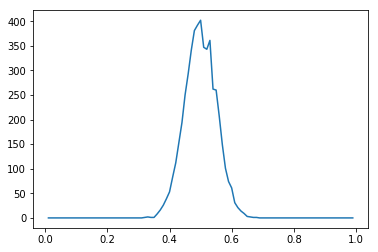

1.7106778621673584


In [172]:
plt.plot(px,py)
plt.show()
print(delay)

이제 이론값을 직접 대입해서 비교해보자. 이론값은 알짜 걸음수가 같을 확률을 모두 더해서 구할 수 있다.

In [188]:
p1=0.01
ppx=[]
ppy=[]

In [189]:
start=time()
while p1<1:
    x=0
    for i in range(n):
        x+=factorial(n)/(factorial(n-i)*factorial(i))*p1**i*(1-p1)**(n-i)*factorial(n)/(factorial(n-i)*factorial(i))*p2**i*(1-p2)**(n-i)
    ppx.append(p1)
    ppy.append(x)
    p1+=0.01
delay=time()-start

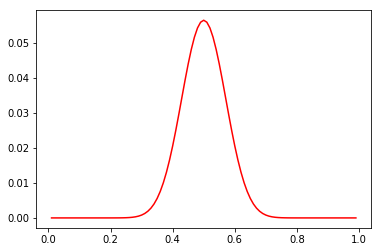

0.35897326469421387


In [190]:
plt.plot(ppx,ppy,"r")
plt.show()
print(delay)

이때 위의 그래프와 비교하였을 때, 직접 binomial 함수를 활용하여 계산했을 경우, 그래프의 형태가 약간 어긋나며 계산 속도 또한 느린것을 확인 할 수 있었다. 이때 그래프의 형태를 조금 더 이론값과 유사하게 만들기 위해서는 binomial의 표본수를 증가시키면 된다.

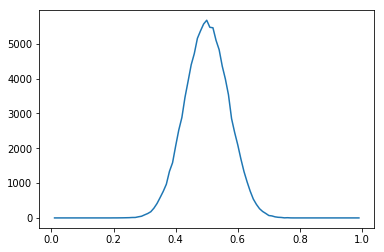

17.316251039505005


In [194]:
p1=0.01
p2=1/2
n=100
N=100000
px=[]
py=[]
start=time()
while p1<1:
    x=0
    s1 = rd.binomial(n,p1,N)
    s2 = rd.binomial(n,p2,N)
    for i in range(N):
        if s1[i]==s2[i]:
            x+=1
    px.append(p1)
    py.append(x)
    p1+=0.01
delay=time()-start
plt.plot(px,py)
plt.show()
print(delay)

이제 그래프의 형태는 이론과 비슷해졌지만 계산속도가 훨씬 느린 것을 확인 할 수 있다. 그렇다면 binomial 함수를 사용하는 이유는 무엇일까?

걸음수를 조금더 증가시켜보자(100걸음에서 200걸음으로). 이때 직접 확률을 계산할 경우, 아래와 같은 오류가 발생한다.

In [191]:
p1=0.01
n=200
ppx=[]
ppy=[]
start=time()
while p1<1:
    x=0
    for i in range(n):
        x+=factorial(n)/(factorial(n-i)*factorial(i))*p1**i*(1-p1)**(n-i)*factorial(n)/(factorial(n-i)*factorial(i))*p2**i*(1-p2)**(n-i)
    ppx.append(p1)
    ppy.append(x)
    p1+=0.01
delay=time()-start
plt.plot(ppx,ppy,"r")
plt.show()
print(delay)

OverflowError: int too large to convert to float

이 오류는 계산 결과가 너무 커서 발생한 것이다. 이는 팩토리얼와 같이 그 값이 무척이나 급격하게 변하는 요소을 포함하는 함수에서 발생하기 쉽다. 이에 비해서 직접 Binomial 함수를 통해 구한 경우 아래와 같이 깔끔한 결과를 얻을 수 있다.

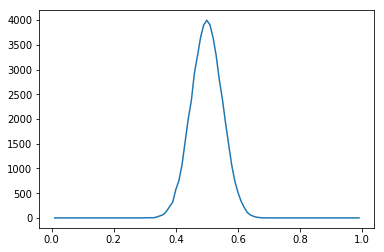

17.283072471618652


In [192]:
p1=0.01
p2=1/2
n=200
N=100000
px=[]
py=[]
start=time()
while p1<1:
    x=0
    s1 = rd.binomial(n,p1,N)
    s2 = rd.binomial(n,p2,N)
    for i in range(N):
        if s1[i]==s2[i]:
            x+=1
    px.append(p1)
    py.append(x)
    p1+=0.01
delay=time()-start
plt.plot(px,py)
plt.show()
print(delay)